In [1]:
# Biblioteca de imports
import numpy as np
import pandas as pd
import string


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

In [3]:
# Baixando o dataset
go_emotion_df = pd.read_csv('../data/go_emotions_dataset.csv')

In [4]:
# Crating a function to clean the text
def cleaning(text):
    text = text.lower()
    text = text.replace('’','')
    text = text.strip()
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 
        
    text = ''.join(char for char in text if not char.isdigit())
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    tokenized_text = [word for word in word_tokens if not word in stop_words]
    
    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v") 
        for word in tokenized_text
    ]
    
    cleaned_sentence = ' '.join(word for word in lemmatized)
    
    return cleaned_sentence
    

In [6]:
# Creating new feature for processed texts
go_emotion_df['text_processed'] = go_emotion_df['text'].apply(cleaning)

In [6]:
!wget https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl

# Defining a helper function to load the data
import pickle
def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

# Loading the data
data = load_from_pickle(directory="merged_training.pkl")

--2022-11-03 02:50:09--  https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/607ptdakxuh5i4s/merged_training.pkl [following]
--2022-11-03 02:50:10--  https://www.dropbox.com/s/raw/607ptdakxuh5i4s/merged_training.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc14601e3fbf52b968c0d4636fd9.dl.dropboxusercontent.com/cd/0/inline/BwA491Y2ub60Q3uoPtsdPulo6SDAtAlNrnD1-0B3rCasydBtj-PPxY1tIFNXM3-2HSj82m3KkDfxZ5x8SayjqOWBIg337arnjEFGBCG5JZfhDsrbrp-nbGd5sTI0f-gPdgUgEC0QDrGTTo3roKIqbSZi_r1YjQxdoYoeBAi5gxpRug/file# [following]
--2022-11-03 02:50:10--  https://uc14601e3fbf52b968c0d4636fd9.dl.dropboxusercontent.com/cd/0/inline/BwA491Y2ub60Q3uoPtsdPulo6SDAtAlNrnD1-0B3rCasydBtj-PPxY1tIFN

In [7]:
data.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


In [9]:
# !pip install datasets
from datasets import load_dataset

emotion_dataset = load_dataset("emotion")

Found cached dataset emotion (/home/tatchiwiggers/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)
100%|██████████| 3/3 [00:00<00:00, 484.97it/s]


In [10]:
emotion_dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [11]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [85]:
import pandas as pd
# emotion_dataset.set_format(type="pandas")
train = emotion_dataset["train"][:]
train.to_csv('emotion.csv')

In [13]:
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [14]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

In [15]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [80]:
sentiments = train['description'].value_counts(normalize=True)
sentiments = pd.DataFrame(sentiments).reset_index()
s = sentiments.rename(columns={'index': 'description', 'description': 'amount'})
s.to_csv('emotion.csv')

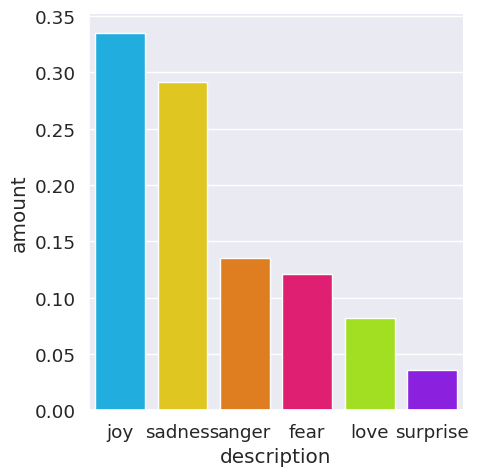

In [79]:
sns.set_style('darkgrid')

sns.catplot(data=s, x="description", y="amount", kind="bar")